Upgrading libraries

In [ ]:
# !pip install tensorflow==2.10
# !pip install --upgrade tensorflow-io

Importing libraries

In [ ]:
!pip  install --upgrade transformers
!pip install nltk rouge_score

  Using cached transformers-4.31.0-py3-none-any.whl (7.4 MB)
  Attempting uninstall: transformers
    Found existing installation: transformers 4.16.2
    Uninstalling transformers-4.16.2:
      Successfully uninstalled transformers-4.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
simplet5 0.1.4 requires transformers==4.16.2, but you have transformers 4.31.0 which is incompatible.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import re

Importing the data

In [ ]:
data = pd.read_csv('news_summary_more.csv')
data.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [ ]:
data.columns

Index(['headlines', 'text'], dtype='object')

Limiting the length of df_articles to 500

In [ ]:
df = data
df = df.text.dropna()
print(df)
df_articles = df.values.tolist()

# Limiting the length of df_articles to 500
df_articles = df_articles[:500]

len(df_articles)

0        Saurav Kant, an alumnus of upGrad and IIIT-B's...
1        Kunal Shah's credit card bill payment platform...
2        New Zealand defeated India by 8 wickets in the...
3        With Aegon Life iTerm Insurance plan, customer...
4        Speaking about the sexual harassment allegatio...
                               ...                        
98396    A CRPF jawan was on Tuesday axed to death with...
98397    'Uff Yeh', the first song from the Sonakshi Si...
98398    According to reports, a new version of the 199...
98399    A new music video shows rapper Snoop Dogg aimi...
98400    Madhesi Morcha, an alliance of seven political...
Name: text, Length: 98401, dtype: object


500

In [ ]:
!pip install -U transformers
# !pip install -U torch

Models used BART, PEGASUS, T5, and BERT

In [ ]:
!pip install datasets transformers[sentencepiece]

## Summarization using T5 model

In [ ]:
import torch
import os
import json

from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

import tensorflow as tf


In [ ]:
# !pip install simplet5 -q


In [ ]:
!pip install sentencepiece

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config
T5_PATH = 'Einmalumdiewelt/T5-Base_GNAD'
t5_model = T5ForConditionalGeneration.from_pretrained(T5_PATH, output_past=True)
t5_tokenizer = T5Tokenizer.from_pretrained(T5_PATH)
x = t5_tokenizer(df_articles, truncation=True, max_length=500)

You are using the legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def t5_summarize(input_text, num_beams=4, num_words=80):
    input_text = ' '.join(input_text.split())
    input_tokenized = t5_tokenizer.encode(input_text, return_tensors="pt").to(device)
    summary_task = torch.tensor([[21603, 10]]).to(device)
    input_tokenized = torch.cat([summary_task, input_tokenized], dim=-1).to(device)

    # Move the model to the same device as input tensors
    t5_model.to(device)

    summary_ids = t5_model.generate(input_tokenized,
                                    num_beams=int(num_beams),
                                    no_repeat_ngram_size=3,
                                    length_penalty=2.0,
                                    min_length=30,
                                    max_length=int(num_words),
                                    early_stopping=True)

    output = [t5_tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False)
              for g in summary_ids]
    return output[0]

# %%time

for i in range(6):
        print('news articles ',i + 1, " : \n" )
        print(t5_summarize(df_articles[i]))
        print('............................................................................\n\n\n\n')

news articles  1  : 

Tech Mahindra's Saurav Kant, a graduate of upGrad's Online Power Learning program, is now a Data Scientist with a 90% salary hike.
............................................................................




news articles  2  : 

A Delhi techie has won a chance to win free food from Swiggy for a year. Users who spend more than 2000 CRED coins on a credit card will get a free meal.
............................................................................




news articles  3  : 

In the fourth ODI of the series, New Zealand defeated India by 8 wickets to win their first match of the five-match series.
............................................................................




news articles  4  : 

Aegon Life iTerm Insurance plan provides life cover up to the age of 100 years. Customers can also save up to â146,800 on taxes.
............................................................................




news articles  5  : 

"What if it's not true, the 

In [ ]:
temp='''A groundbreaking study published today in Environmental Research Letters links the area burned by forest fires and increases in drought- and fire-danger conditions to heat-trapping emissions from the largest global carbon producers.
The new analysis, led by experts at the Union of Concerned Scientists (UCS), “The Fossil Fuels behind Forest Fires,” found that 19.8 million acres burned—37% of the total area scorched by forest fires in the western United States and southwestern Canada since 1986—can be attributed to heat-trapping emissions traced to the world’s 88 largest fossil fuel producers and cement manufacturers. Emissions from these companies also contributed to nearly half of the observed increase in conditions that raise the risk of large, severe forest fires across the region since 1901, the study found. The findings provide new data that can advance efforts to hold companies accountable for past, present, and future climate damages and risks.
“Over the last several decades, human-caused climate change has turned routine Western wildfires into exceptionally destructive events. Towns are turning to ash and livelihoods are being destroyed,” said Kristina Dahl, report author and principal climate scientist at the Union of Concerned Scientists. “Our study offers scientifically backed answers to questions of who bears the responsibility for this gut-wrenching destruction. We’re hopeful that with new evidence in hand, policymakers, elected officials, and legal experts will be better equipped to truly hold fossil fuel companies accountable in public, political, and legal arenas.”
UCS scientists used vapor pressure deficit (VPD)—a measure of air’s ability to draw water out of plants and soils—to demonstrate how emissions traced to major fossil fuel producers have had a direct hand in the steep increases in the area burned by forest fires and the rise of fire-danger conditions. The authors also assessed the latest science on how changes in VPD have contributed to increases in the number of large fires, the length of the fire season, and the severity of forest fires, as well as a prolonged megadrought.
The study builds on a growing body of climate attribution studies that connect emissions from the extraction and use of fossil fuel products to increased average temperature of the Earth’s surface, global sea level rise, and ocean acidification. Using attribution research like this as a foundation, more than 30 states, cities, and counties are currently suing major oil and gas corporations to seek redress for the harm they have suffered from climate change and to limit future emissions. The novel, interdisciplinary findings in this UCS research are positioned to accelerate improved corporate accountability.
“This study represents a significant breakthrough in attribution science—directly linking wildfire destruction in a specific region to the largest global carbon producers,” said Carly Phillips, report author and research scientist for the Accountability Campaign at UCS. “This research builds on over a decade of science tracing heat-trapping emissions and impacts on a global scale to particular fossil fuel operations. More specifically, UCS’ new findings can inform on-going dialogues around the world that are focused on the responsibility of these 88 entities for past, present, and future climate risks.”
The communities, cultures, and ecosystems of the western United States and southwestern Canada evolved alongside wildfire for thousands of years. But over the past several decades, almost all aspects of wildfires have worsened across the forests of Western North America, including land in California, Canada, Colorado, Idaho, New Mexico, Oregon, Washington and Wyoming. The damages from these hazards are mounting, with impacts extending far beyond a given fire scar, harming people, economies and ecosystems.
Communities of color and low-income communities face disproportionate public health risks from wildfire due to systemic socioeconomic injustices and are less able to recover. People of color, particularly Native Americans, are also more geographically at risk of wildfires and smoke exposure.
“While the impacts of increasingly dangerous wildfires are pervasive, it’s crucial to acknowledge that the burden is not borne equally,” said José Pablo Ortiz-Partida, senior bilingual water and climate scientist at the UCS. “As we turn to solutions—both restorative and preventative—the needs of underserved and other vulnerable communities must be front and center.”
In addition to holding fossil fuel companies accountable, UCS experts recommend programs and policies that: rapidly reduce heat-trapping emissions, reduce human-ignited wildfires, increase resources for forest health, and protect community health and safety including through equitable investments in fire preparedness and recovery.'''
print(t5_summarize(temp))


Token indices sequence length is longer than the specified maximum sequence length for this model (991 > 512). Running this sequence through the model will result in indexing errors


In the western United States and southwestern Canada, wildfires have worsened dramatically over the past several decades. Now, a new study shows that fossil fuel companies are responsible for nearly half of the damage caused by fires.


In [ ]:
temp='''The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the Daman and Diu administration a day apart. The circular was withdrawn through a one-line order issued late in the evening by the UT?s department of personnel and administrative reforms.?The circular is ridiculous. There are sensitivities involved. How can the government dictate who I should tie rakhi to? We should maintain the professionalism of a workplace? an official told Hindustan Times earlier in the day. She refused to be identified.The notice was issued on Daman and Diu administrator and former Gujarat home minister Praful Kodabhai Patel?s direction, sources said.Rakshabandhan, a celebration of the bond between brothers and sisters, is one of several Hindu festivities and rituals that are no longer confined of private, family affairs but have become tools to push politic al ideologies.In 2014, the year BJP stormed to power at the Centre, Rashtriya Swayamsevak Sangh (RSS) chief Mohan Bhagwat said the festival had ?national significance? and should be celebrated widely ?to protect Hindu culture and live by the values enshrined in it?. The RSS is the ideological parent of the ruling BJP.Last year, women ministers in the Modi government went to the border areas to celebrate the festival with soldiers. A year before, all cabinet ministers were asked to go to their constituencies for the festival.'''
print(t5_summarize(temp))

Daman and Diu administration forced to withdraw a circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace. The circular triggered a backlash on social media.


ROUGE SCORE

In [ ]:
from datasets import load_metric

rouge = load_metric("rouge")
predictions = ["Daman and Diu administration forced to withdraw a circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace. The circular triggered a backlash on social media."]
references = ["The Union Territory of Daman and Diu has withdrawn its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7."]
rouge.compute(predictions=predictions, references=references)

{'rouge1': AggregateScore(low=Score(precision=0.4827586206896552, recall=0.4375, fmeasure=0.4590163934426229), mid=Score(precision=0.4827586206896552, recall=0.4375, fmeasure=0.4590163934426229), high=Score(precision=0.4827586206896552, recall=0.4375, fmeasure=0.4590163934426229)),
 'rouge2': AggregateScore(low=Score(precision=0.21428571428571427, recall=0.1935483870967742, fmeasure=0.20338983050847456), mid=Score(precision=0.21428571428571427, recall=0.1935483870967742, fmeasure=0.20338983050847456), high=Score(precision=0.21428571428571427, recall=0.1935483870967742, fmeasure=0.20338983050847456)),
 'rougeL': AggregateScore(low=Score(precision=0.3793103448275862, recall=0.34375, fmeasure=0.36065573770491804), mid=Score(precision=0.3793103448275862, recall=0.34375, fmeasure=0.36065573770491804), high=Score(precision=0.3793103448275862, recall=0.34375, fmeasure=0.36065573770491804)),
 'rougeLsum': AggregateScore(low=Score(precision=0.3793103448275862, recall=0.34375, fmeasure=0.3606557

#Summarization using BART model

Importing the libraries

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig

Initializing setup for fine-tuning

In [ ]:
bart_PATH = 'facebook/bart-large-cnn'
bart_model = BartForConditionalGeneration.from_pretrained(bart_PATH, output_past=True)
bart_tokenizer = BartTokenizer.from_pretrained(bart_PATH)
x = bart_tokenizer(df_articles, truncation=True, max_length=500)

In [ ]:
def bart_summarize(input_text, num_beams=4, num_words=80):

    input_text = ' '.join(input_text.split())# It collapses multiple consecutive whitespace characters
    #(e.g., tabs, spaces, newlines) into a single space, effectively cleaning up the text and making
    #it more consistent in terms of spacing.
    print(input_text)
    input_tokenized = bart_tokenizer.encode(input_text, return_tensors='pt')
    summary_ids = bart_model.generate(input_tokenized,
                                      num_beams=int(num_beams),
                                      no_repeat_ngram_size=3,
                                      length_penalty=2.0,
                                      min_length=80,
                                      max_length=int(num_words),
                                      early_stopping=True)
    output = [bart_tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_ids]
    return output[0]


In [ ]:
for i in range(6):

        print('news article ',i + 1, " : \n" )
        print(bart_summarize(df_articles[i]))
        print('............................................................................\n\n\n\n')

news article  1  : 

Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.
Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. UpGrad's Online Power Learning has powered 3 lakh+
............................................................................




news article  2  : 

Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after

In [ ]:
temp='''The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the Daman and Diu administration a day apart. The circular was withdrawn through a one-line order issued late in the evening by the UT?s department of personnel and administrative reforms.?The circular is ridiculous. There are sensitivities involved. How can the government dictate who I should tie rakhi to? We should maintain the professionalism of a workplace? an official told Hindustan Times earlier in the day. She refused to be identified.The notice was issued on Daman and Diu administrator and former Gujarat home minister Praful Kodabhai Patel?s direction, sources said.Rakshabandhan, a celebration of the bond between brothers and sisters, is one of several Hindu festivities and rituals that are no longer confined of private, family affairs but have become tools to push politic al ideologies.In 2014, the year BJP stormed to power at the Centre, Rashtriya Swayamsevak Sangh (RSS) chief Mohan Bhagwat said the festival had ?national significance? and should be celebrated widely ?to protect Hindu culture and live by the values enshrined in it?. The RSS is the ideological parent of the ruling BJP.Last year, women ministers in the Modi government went to the border areas to celebrate the festival with soldiers. A year before, all cabinet ministers were asked to go to their constituencies for the festival.'''
print(bart_summarize(temp))


The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the Daman

Rouge score

In [ ]:
from datasets import load_metric

rouge = load_metric("rouge")
predictions = ["The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues. The order triggered a backlash from employees and was ripped apart on social media. The circular was withdrawn through a one-line order issued late in the evening by the UT?s department of personnel and administrative reforms. The notice was issued on former Gujarat home minister Pra"]
references = ["The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media."]
rouge.compute(predictions=predictions, references=references)

{'rouge1': AggregateScore(low=Score(precision=0.4264705882352941, recall=0.48333333333333334, fmeasure=0.453125), mid=Score(precision=0.4264705882352941, recall=0.48333333333333334, fmeasure=0.453125), high=Score(precision=0.4264705882352941, recall=0.48333333333333334, fmeasure=0.453125)),
 'rouge2': AggregateScore(low=Score(precision=0.16417910447761194, recall=0.1864406779661017, fmeasure=0.17460317460317462), mid=Score(precision=0.16417910447761194, recall=0.1864406779661017, fmeasure=0.17460317460317462), high=Score(precision=0.16417910447761194, recall=0.1864406779661017, fmeasure=0.17460317460317462)),
 'rougeL': AggregateScore(low=Score(precision=0.29411764705882354, recall=0.3333333333333333, fmeasure=0.3125), mid=Score(precision=0.29411764705882354, recall=0.3333333333333333, fmeasure=0.3125), high=Score(precision=0.29411764705882354, recall=0.3333333333333333, fmeasure=0.3125)),
 'rougeLsum': AggregateScore(low=Score(precision=0.29411764705882354, recall=0.3333333333333333, 

# Summarizing using PEGASUS

Importing the libraries

In [ ]:
import torch
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

Initializing setup for fine-tuning

In [ ]:
model_name = 'tuner007/pegasus_summarizer'
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)

Function to get response

In [ ]:
def get_response_pegasus(input_text):
  batch = tokenizer([input_text],truncation=True,padding='longest',max_length=1024, return_tensors="pt",return_token_type_ids=False).to(torch_device)
  gen_out = model.generate(**batch,max_length=128,num_beams=5, num_return_sequences=1, temperature=1.5)
  output_text = tokenizer.batch_decode(gen_out, skip_special_tokens=True)
  return output_text

# %%time
for i in range(6):

        print('news article ',i + 1, " : \n" )
        print(get_response_pegasus(df_articles[i]))
        print('............................................................................\n\n\n\n')

summary='The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the Daman and Diu administration a day apart. The circular was withdrawn through a one-line order issued late in the evening by the UT?s department of personnel and administrative reforms.?The circular is ridiculous. There are sensitivities involved. How can the government dictate who I should tie rakhi to? We should maintain the professionalism of a workplace? an official told Hindustan Times earlier in the day. She refused to be identified.The notice was issued on Daman and Diu administrator and former Gujarat home minister Praful Kodabhai Patel?s direction, sources said.Rakshabandhan, a celebration of the bond between brothers and sisters, is one of several Hindu festivities and rituals that are no longer confined of private, family affairs but have become tools to push politic al ideologies.In 2014, the year BJP stormed to power at the Centre, Rashtriya Swayamsevak Sangh (RSS) chief Mohan Bhagwat said the festival had ?national significance? and should be celebrated widely ?to protect Hindu culture and live by the values enshrined in it?. The RSS is the ideological parent of the ruling BJP.Last year, women ministers in the Modi government went to the border areas to celebrate the festival with soldiers. A year before, all cabinet ministers were asked to go to their constituencies for the festival.'
print(get_response_pegasus(df_articles[i]))


news article  1  : 

["saurav kant was an alumnus of upgrad and iiit - b's pg program in machine learning and artificial intelligence. upgrad's online power learning has powered 3 lakh + careers. he was a sr systems engineer at infosys with almost 5 years of work experience."]
............................................................................




news article  2  : 

["kunal shah's credit card bill payment platform, cred, gave users a chance to win free food from swiggy for one year. customers get one cred coin per rupee of bill paid, which can be used to boost rewards from brands like ixigo, bookmyshow, ubereats, cult."]
............................................................................




news article  3  : 

["new zealand beat india by 8 wickets in the fourth odi at hamilton. new zealand won their first match of the five - match odi series. india lost an international match under rohit sharma's captaincy. the match saw india get all out for 92, their seventh low

In [ ]:
temp='''The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the Daman and Diu administration a day apart. The circular was withdrawn through a one-line order issued late in the evening by the UT?s department of personnel and administrative reforms.?The circular is ridiculous. There are sensitivities involved. How can the government dictate who I should tie rakhi to? We should maintain the professionalism of a workplace? an official told Hindustan Times earlier in the day. She refused to be identified.The notice was issued on Daman and Diu administrator and former Gujarat home minister Praful Kodabhai Patel?s direction, sources said.Rakshabandhan, a celebration of the bond between brothers and sisters, is one of several Hindu festivities and rituals that are no longer confined of private, family affairs but have become tools to push politic al ideologies.In 2014, the year BJP stormed to power at the Centre, Rashtriya Swayamsevak Sangh (RSS) chief Mohan Bhagwat said the festival had ?national significance? and should be celebrated widely ?to protect Hindu culture and live by the values enshrined in it?. The RSS is the ideological parent of the ruling BJP.Last year, women ministers in the Modi government went to the border areas to celebrate the festival with soldiers. A year before, all cabinet ministers were asked to go to their constituencies for the festival.'''
print(get_response_pegasus(temp))


['the union territory? s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate rakshabandhan at workplace. the order was issued late in the evening by the ut? s department of personnel and administrative reforms. a year before, all cabinet ministers were asked to go to their constituencies for the festival with soldiers.']


In [ ]:
from datasets import load_metric

rouge = load_metric("rouge")
predictions = ['the union territory? s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate rakshabandhan at workplace. the order was issued late in the evening by the ut? s department of personnel and administrative reforms. a year before, all cabinet ministers were asked to go to their constituencies for the festival with soldiers.']
references = ["The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media."]
rouge.compute(predictions=predictions, references=references)

{'rouge1': AggregateScore(low=Score(precision=0.484375, recall=0.5166666666666667, fmeasure=0.5000000000000001), mid=Score(precision=0.484375, recall=0.5166666666666667, fmeasure=0.5000000000000001), high=Score(precision=0.484375, recall=0.5166666666666667, fmeasure=0.5000000000000001)),
 'rouge2': AggregateScore(low=Score(precision=0.23809523809523808, recall=0.2542372881355932, fmeasure=0.2459016393442623), mid=Score(precision=0.23809523809523808, recall=0.2542372881355932, fmeasure=0.2459016393442623), high=Score(precision=0.23809523809523808, recall=0.2542372881355932, fmeasure=0.2459016393442623)),
 'rougeL': AggregateScore(low=Score(precision=0.25, recall=0.26666666666666666, fmeasure=0.2580645161290323), mid=Score(precision=0.25, recall=0.26666666666666666, fmeasure=0.2580645161290323), high=Score(precision=0.25, recall=0.26666666666666666, fmeasure=0.2580645161290323)),
 'rougeLsum': AggregateScore(low=Score(precision=0.25, recall=0.26666666666666666, fmeasure=0.258064516129032

# Summarizing using BERT model

Importing the libraries

Initializing setup for fine-tuning

Function to get response

In [ ]:
from transformers import BertTokenizerFast, EncoderDecoderModel
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizerFast.from_pretrained('mrm8488/bert-small2bert-small-finetuned-cnn_daily_mail-summarization')
model = EncoderDecoderModel.from_pretrained('mrm8488/bert-small2bert-small-finetuned-cnn_daily_mail-summarization').to(device)

def generate_summary(text):
    # cut off at BERT max length 512
    inputs = tokenizer([text], padding="max_length", truncation=True, max_length=512, return_tensors="pt")
    input_ids = inputs.input_ids.to(device)
    attention_mask = inputs.attention_mask.to(device)

    output = model.generate(input_ids, attention_mask=attention_mask)

    return tokenizer.decode(output[0], skip_special_tokens=True)

# text = "your text to be summarized here..."
for i in range(6):

        print('news article ',i + 1, " : \n" )
        print(generate_summary(df_articles[i]))
        print('............................................................................\n\n\n\n')



news article  1  : 



/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (142) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


saurav kant was an alumnus of upgrad and iiit - b's pg program in machine learning and artificial intelligence. upgrad's online power learning has powered 3 lakh + careers. he was a sr systems engineer at infosys with almost 5 years of work experience.
............................................................................




news article  2  : 

the credit card bill payment platform, cred, gave users a chance to win free food from swiggy for one year. customers get one cred coin per rupee of bill paid, which can be used to boost rewards from brands like ixigo, bookmyshow, ubereats, cult.
............................................................................




news article  3  : 

india beat india by 8 wickets in the fourth odi at hamilton. new zealand defeated india by eight wickets to win their first match of the series. india lost an international match under rohit sharma's captaincy. the match saw india get all out for 92, their seventh lowest total in odi cricket his

In [ ]:
temp='''The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the Daman and Diu administration a day apart. The circular was withdrawn through a one-line order issued late in the evening by the UT?s department of personnel and administrative reforms.?The circular is ridiculous. There are sensitivities involved. How can the government dictate who I should tie rakhi to? We should maintain the professionalism of a workplace? an official told Hindustan Times earlier in the day. She refused to be identified.The notice was issued on Daman and Diu administrator and former Gujarat home minister Praful Kodabhai Patel?s direction, sources said.Rakshabandhan, a celebration of the bond between brothers and sisters, is one of several Hindu festivities and rituals that are no longer confined of private, family affairs but have become tools to push politic al ideologies.In 2014, the year BJP stormed to power at the Centre, Rashtriya Swayamsevak Sangh (RSS) chief Mohan Bhagwat said the festival had ?national significance? and should be celebrated widely ?to protect Hindu culture and live by the values enshrined in it?. The RSS is the ideological parent of the ruling BJP.Last year, women ministers in the Modi government went to the border areas to celebrate the festival with soldiers. A year before, all cabinet ministers were asked to go to their constituencies for the festival.'''
print(generate_summary(temp))


the union territory? s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate rakshabandhan at workplace. the order was issued late in the evening by the ut? s department of personnel and administrative reforms. a year earlier, women ministers in the modi government went to the border areas to celebrate the festival with soldiers.


In [ ]:
from datasets import load_metric

rouge = load_metric("rouge")
predictions = ["the union territory? s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate rakshabandhan at workplace. the order was issued late in the evening by the ut? s department of personnel and administrative reforms. a year earlier, women ministers in the modi government went to the border areas to celebrate the festival with soldiers."]
references = ["The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media."]
rouge.compute(predictions=predictions, references=references)

{'rouge1': AggregateScore(low=Score(precision=0.4696969696969697, recall=0.5166666666666667, fmeasure=0.4920634920634921), mid=Score(precision=0.4696969696969697, recall=0.5166666666666667, fmeasure=0.4920634920634921), high=Score(precision=0.4696969696969697, recall=0.5166666666666667, fmeasure=0.4920634920634921)),
 'rouge2': AggregateScore(low=Score(precision=0.2153846153846154, recall=0.23728813559322035, fmeasure=0.22580645161290325), mid=Score(precision=0.2153846153846154, recall=0.23728813559322035, fmeasure=0.22580645161290325), high=Score(precision=0.2153846153846154, recall=0.23728813559322035, fmeasure=0.22580645161290325)),
 'rougeL': AggregateScore(low=Score(precision=0.24242424242424243, recall=0.26666666666666666, fmeasure=0.253968253968254), mid=Score(precision=0.24242424242424243, recall=0.26666666666666666, fmeasure=0.253968253968254), high=Score(precision=0.24242424242424243, recall=0.26666666666666666, fmeasure=0.253968253968254)),
 'rougeLsum': AggregateScore(low=S

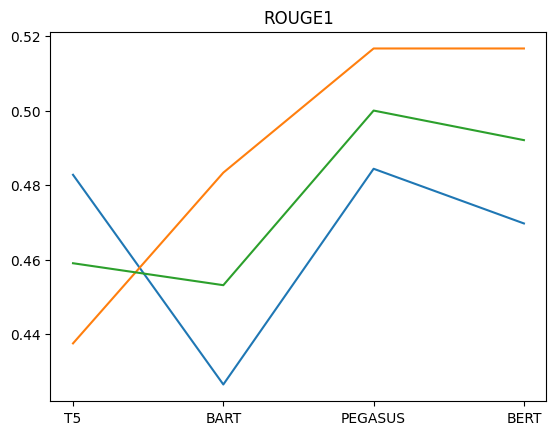

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.title('ROUGE1')
xpoints = np.array(['T5','BART','PEGASUS','BERT'])
ypoints_precision = np.array([0.4827586206896552,0.4264705882352941 ,0.484375,0.4696969696969697])
ypoints_recall = np.array([0.4375, 0.48333333333333334,0.5166666666666667,0.5166666666666667])
ypoints_fmeasure = np.array([0.4590163934426229, 0.453125,0.5000000000000001,0.4920634920634921])

plt.plot(xpoints, ypoints_precision,label='precision')
plt.plot(xpoints, ypoints_recall,label='recall')
plt.plot(xpoints, ypoints_fmeasure,label='fmeasure')
plt.show()


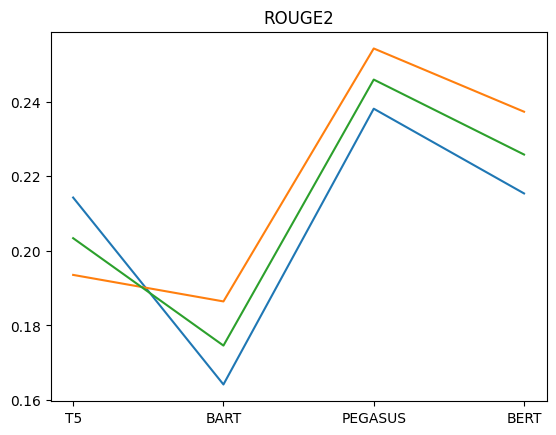

In [ ]:
plt.title('ROUGE2')
xpoints = np.array(['T5','BART','PEGASUS','BERT'])
ypoints_precision = np.array([0.21428571428571427,0.16417910447761194 ,0.23809523809523808,0.2153846153846154])
ypoints_recall = np.array([0.1935483870967742, 0.1864406779661017,0.2542372881355932,0.23728813559322035])
ypoints_fmeasure = np.array([0.20338983050847456, 0.17460317460317462,0.2459016393442623,0.22580645161290325])

plt.plot(xpoints, ypoints_precision,label='precision')
plt.plot(xpoints, ypoints_recall,label='recall')
plt.plot(xpoints, ypoints_fmeasure,label='fmeasure')
plt.show()

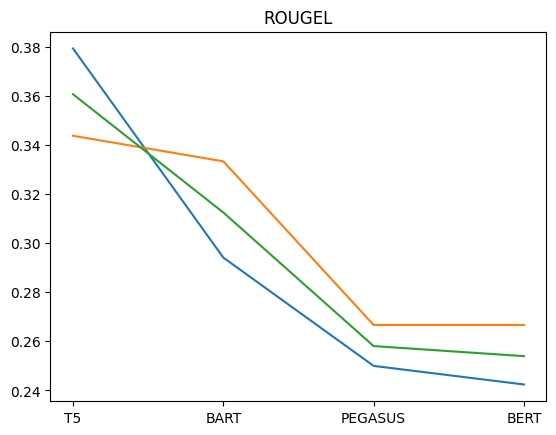

In [ ]:
plt.title('ROUGEL')
xpoints = np.array(['T5','BART','PEGASUS','BERT'])
ypoints_precision = np.array([0.3793103448275862,0.29411764705882354 ,0.25,0.24242424242424243])
ypoints_recall = np.array([0.34375, 0.3333333333333333,0.26666666666666666,0.26666666666666666])
ypoints_fmeasure = np.array([0.36065573770491804, 0.3125,0.2580645161290323,0.253968253968254])

plt.plot(xpoints, ypoints_precision,label='precision')
plt.plot(xpoints, ypoints_recall,label='recall')
plt.plot(xpoints, ypoints_fmeasure,label='fmeasure')
plt.show()

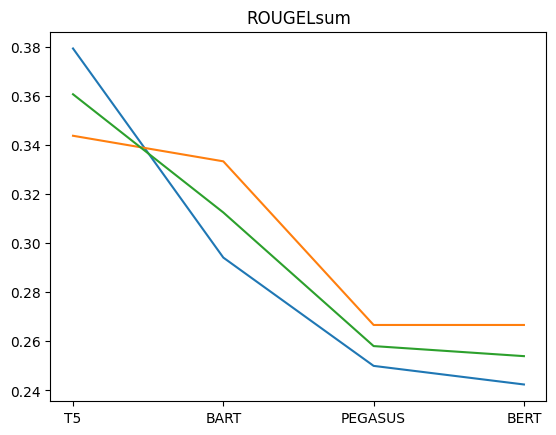

In [ ]:
plt.title('ROUGELsum')
xpoints = np.array(['T5','BART','PEGASUS','BERT'])
ypoints_precision = np.array([0.3793103448275862,0.29411764705882354 ,0.25,0.24242424242424243])
ypoints_recall = np.array([0.34375, 0.3333333333333333,0.26666666666666666,0.26666666666666666])
ypoints_fmeasure = np.array([0.36065573770491804, 0.3125,0.2580645161290323,0.253968253968254])

plt.plot(xpoints, ypoints_precision,label='precision')
plt.plot(xpoints, ypoints_recall,label='recall')
plt.plot(xpoints, ypoints_fmeasure,label='fmeasure')
plt.show()